In [2]:
df = pd.read_parquet('walmart.parquet').sample(n=1000)
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
31798,1,218350,58,17,2,93188,23.043333,10.520515,2.910667,0.205456,128.215848,1.934053,6.605667,0.236826


In [3]:
df = df[['weekly_sales', 'dept', 'size', 'store', 'unemployment_stdev']]

In [4]:
X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
tf = pca.fit_transform(X)

In [8]:
print('components: {0}'.format(pca.components_))
print('mean: {0}'.format(pca.mean_))
print('covariance: {0}'.format(pca.get_covariance))
print('contribution ratio: {0}'.format(pca.explained_variance_ratio_))
print('accumulated contribution ratio: {0}'.format(sum(pca.explained_variance_ratio_)))

components: [[-1.00250421e-05 -9.99999999e-01  3.43082964e-05  2.28063129e-06]
 [ 9.99761282e-01 -9.27139439e-06  2.18041112e-02  1.39989058e-03]]
mean: [4.36400000e+01 1.38513158e+05 2.22480000e+01 7.90653683e+00]
covariance: <bound method _BasePCA.get_covariance of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>
contribution ratio: [9.99999704e-01 2.53478965e-07]
accumulated contribution ratio: 0.999999957125546


Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

Text(0.5, 1.0, 'principal component')

Text(0.5, 0, 'pc1')

Text(0, 0.5, 'pc2')

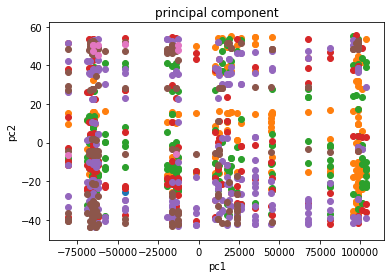

In [9]:
from matplotlib import pyplot as plt

for label in np.unique(y):
    plt.scatter(tf[y == label, 0], tf[y == label, 1])
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    
plt.show()

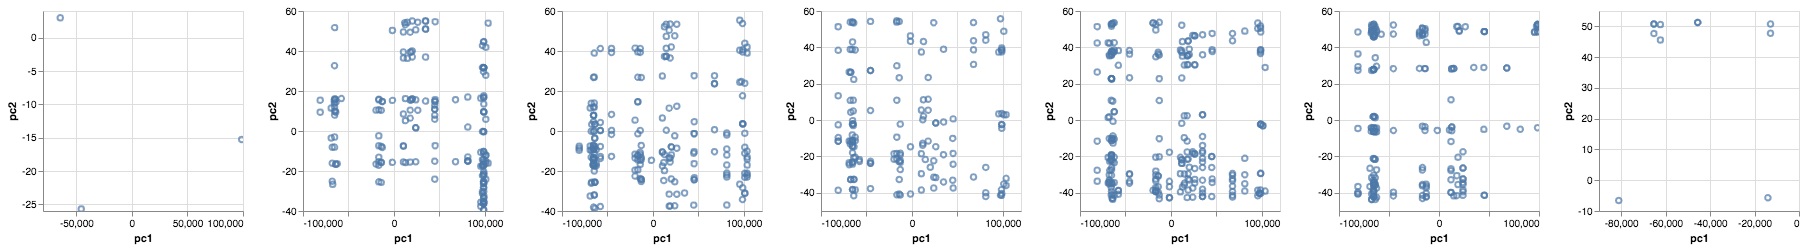

In [10]:
import altair as alt

plots = []

for label in np.unique(y):
    pcs = pd.DataFrame({'pc1': tf[y == label, 0], 'pc2': tf[y == label, 1]})
    plot = alt.Chart(pcs).mark_point().encode(x='pc1', y='pc2').properties(width=200, height=200).interactive() 
    plots.append(plot)

alt.hconcat(*plots)